In [1]:
import warnings
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
sys.path.append("C:/dev/pycmqlib3/")
sys.path.append("C:/dev/pycmqlib3/misc_scripts/")
warnings.filterwarnings('ignore')
import misc
import data_handler as dh
import plotly_examples
import backtest
import copy
%matplotlib inline

ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF"]
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu'] #, 'sc', 'fu', 'eg']
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs'] #, 'b']
ags_soft_mkts = ['CF', 'SR', 'jd']#, 'AP', 'sp']
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts

In [7]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']
sim_start_dict = {'AP': datetime.date(2018,1,1), \
                 'SM': datetime.date(2017,1,1), \
                 'SF': datetime.date(2017,1,1), \
                 'ni': datetime.date(2016,1,1), \
                 'pb': datetime.date(2016,7,1)}

start_date = datetime.date(2016,1,1)
end_date = datetime.date(2020,6,19)

sim_products = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'OI', \
                'l', 'pp', 'v', 'TA', 'MA', \
                'a', 'm', 'RM', 'y', 'p', 'SR', 'CF', 'jd',\
                'c', 'cs', 'cu', 'ni', 'zn', 'al', 'SM', 'SF', 'pb'] #, 'AP', 'pb']
#sim_products = ['jd']
shift_mode = 1
freq = 'd'

args = {'roll_rule': '-30b', 'freq': freq, 'shift_mode': shift_mode}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'roll_rule': '-30b', 'freq': freq, 'shift_mode': shift_mode}
ni_args = {'roll_rule': '-30b', 'freq': freq, 'shift_mode': shift_mode}
eq_args = {'roll_rule': '-1b', 'freq': freq, 'shift_mode': shift_mode}
bond_args = {'roll_rule': '-20b', 'freq': freq, 'shift_mode': shift_mode}
precious_args = {'roll_rule': '-25b', 'freq': freq, 'shift_mode': shift_mode}

df_list = []

for idx, asset in enumerate(sim_products):
    use_args = copy.copy(args)
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn']:
        use_args = base_args
    elif asset in ['ni']:
        use_args = ni_args
    elif asset in bond_fut_mkts + ['bu']:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict.get(asset, start_date), start_date)
    use_args['end_date'] = end_date    
    for idy, nb in enumerate([1, 2]):
        use_args['n'] = nb
        print("loading mkt = %s, nb = %s, args = %s" % (asset, nb, use_args))
        df = misc.nearby(asset, **use_args)
        if freq == 'm':
            df = misc.cleanup_mindata(df, asset)
        if (idx == 0) and (idy == 0) and (freq == 'm'):
            df_list.append(df[['date', 'min_id']])
        xdf = df[field_list]
        xdf['expiry'] = xdf['contract'].apply(lambda x: misc.contract_expiry(x, misc.CHN_Holidays))
        xdf.columns = [(asset+str(nb), col) for col in xdf.columns]
        df_list.append(xdf)
all_df = pd.concat(df_list, axis = 1, sort = False)

loading mkt = rb, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 6, 19), 'n': 1}
loading mkt = rb, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 6, 19), 'n': 2}
loading mkt = hc, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 6, 19), 'n': 1}
loading mkt = hc, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 6, 19), 'n': 2}
loading mkt = i, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 6, 19), 'n': 1}
loading mkt = i, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_d

loading mkt = cu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 6, 19), 'n': 1}
loading mkt = cu, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 6, 19), 'n': 2}
loading mkt = ni, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 6, 19), 'n': 1}
loading mkt = ni, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 6, 19), 'n': 2}
loading mkt = zn, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end_date': datetime.date(2020, 6, 19), 'n': 1}
loading mkt = zn, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 1, 1), 'end

In [6]:
print(all_df[[(asset + str(2), 'close') for asset in sim_products]])
for asset in sim_products:
    all_df[(asset + str(1), 'tdiff')] = all_df.apply(lambda row: (row[(asset + str(2), 'expiry')]-row[(asset + str(1), 'expiry')]).days/365.0, axis=1)
    all_df[(asset + str(1), 'roll_yield' )] = all_df.apply(lambda row: \
                (np.log(row[(asset + str(1), 'close')] - row[(asset + str(1), 'shift')])\
                -np.log(row[(asset + str(2), 'close')] - row[(asset + str(2), 'shift')]))\
                /row[(asset + str(1), 'tdiff')], axis=1)


            (rb2, close)  (hc2, close)  (i2, close)  (j2, close)  \
2017-01-05        1199.0        1797.0        209.5        635.0   
2017-01-06        1161.0        1720.0        200.0        645.0   
2017-01-09        1288.0        1881.0        230.0        698.5   
2017-01-10        1412.0        1991.0        251.5        776.0   
2017-01-12        1431.0        1995.0        267.5        792.5   
...                  ...           ...          ...          ...   
2020-06-15        3421.0        3414.0        685.0       1855.0   
2020-06-16        3444.0        3443.0        701.5       1872.0   
2020-06-17        3436.0        3433.0        691.0       1859.0   
2020-06-18        3458.0        3479.0        691.0       1877.5   
2020-06-19        3497.0        3516.0        694.0       1891.5   

            (jm2, close)  (ru2, close)  (FG2, close)  (ZC2, close)  \
2017-01-05         732.5       26230.0         911.0         440.4   
2017-01-06         733.0       26015.0     

             close contract  roll_yield
date                                   
2017-01-05   357.0   rb1705    0.038975
2017-01-06   327.0   rb1705    0.046007
2017-01-09   462.0   rb1705    0.050296
2017-01-10   581.0   rb1705    0.044571
2017-01-12   621.0   rb1705    0.059874
...            ...      ...         ...
2020-06-15  3573.0   rb2010    0.172473
2020-06-16  3601.0   rb2010    0.176858
2020-06-17  3586.0   rb2010    0.169524
2020-06-18  3613.0   rb2010    0.173962
2020-06-19  3646.0   rb2010    0.165540

[825 rows x 3 columns]


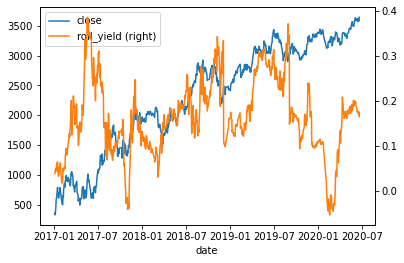

In [5]:
df = all_df[[col_name for col_name in all_df.columns if col_name[0] == 'rb1']].copy()
df.columns = [col[1] for col in df.columns]
df.index.name ='date'
df[['close', 'roll_yield']].plot(secondary_y=['roll_yield'])
print(df[['close', 'contract','roll_yield']])
plt.show()
#xdf = dh.conv_ohlc_freq1(xdf, 's1')
win_1 = 1
win_2 = 1
df['MA1'] = dh.MA(df, n = win_1, field='roll_yield')
df['MA2'] = dh.MA(df, n = win_2, field='roll_yield')



{'trade_count': 27.0, 'trade_mean': 35.25925925925926, 'trade_std': 421.84809447811284, 'trade_min': -548.0, 'trade_25pct': -127.0, 'trade_50pct': -53.0, 'trade_75pct': 21.5, 'trade_max': 1351.0, 'trade_sum': 952.0, 'win_count': 9.0, 'win_mean': 406.44444444444446, 'win_std': 549.7918040292869, 'win_min': 3.0, 'win_25pct': 34.0, 'win_50pct': 80.0, 'win_75pct': 463.0, 'win_max': 1351.0, 'win_sum': 3658.0, 'loss_count': 18.0, 'loss_mean': -150.33333333333334, 'loss_std': 143.21394936987681, 'loss_min': -548.0, 'loss_25pct': -201.25, 'loss_50pct': -105.0, 'loss_75pct': -54.75, 'loss_max': -2.0, 'loss_sum': -2706.0, 'win_ratio': 0.3333333333333333}
                              0
avg_pnl_1y             1.126531
avg_pnl_2y             0.700205
avg_pnl_3y            -0.233607
avg_pnl_4y             1.098563
max_dd_period_1y    -151.000000
max_dd_period_2y    -397.000000
max_dd_period_3y    -627.000000
max_dd_period_4y    -929.000000
max_drawdown_1y    -1291.000000
max_drawdown_2y    -1365.00

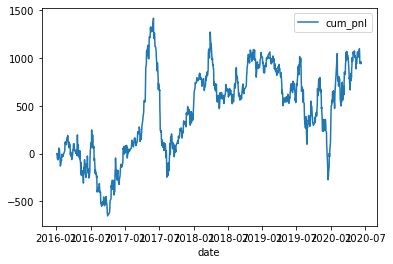

In [47]:
margin_rate = [0.08, 0.08]
pnl_tenors = ['1y', '2y', '3y', '4y']
cost_ratio = 1.0
offset = 0.0
start_capital = 0.0

long_signal = pd.Series(np.nan, index = df.index)
long_flag = df['MA1']> 0.0
long_signal[long_flag] = 1
cover_flag = df['MA1']<0.0
long_signal[cover_flag] = 0
long_signal = long_signal.shift(1).fillna(method='ffill').fillna(0)
short_signal = pd.Series(np.nan, index = df.index)
short_flag = df['MA1']< 0.0
short_signal[short_flag] = -1
cover_flag = df['MA1']> 0.0
short_signal[cover_flag] = 0
short_signal = short_signal.shift(1).fillna(method='ffill').fillna(0)
df['pos'] = (long_signal + short_signal)
df['pos'][-1] = 0.0
df['cost'] = abs(df['pos'] - df['pos'].shift(1)) * offset
df['cost'] = df['cost'].fillna(0.0)
df['traded_price'] = df.open
closed_trades = backtest.simdf_to_trades1(df, slippage = offset)
res_trade = backtest.get_trade_stats(closed_trades)

(res_pnl, ts) = backtest.get_pnl_stats([df], margin_rate, 'd', tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
ts[['cum_pnl']].plot()
print(res_trade)
pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
print(pnl_df)